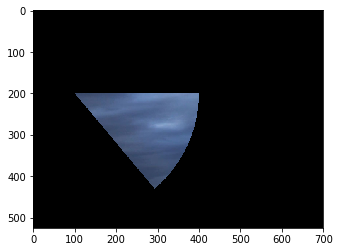

In [8]:
from matplotlib import pyplot as pp
import matplotlib.image as Image

import numpy as np

def sector_mask(shape,centre,radius,angle_range):
    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    """

    x,y = np.ogrid[:shape[0],:shape[1]]
    cx,cy = centre
    tmin,tmax = np.deg2rad(angle_range)

    # ensure stop angle > start angle
    if tmax < tmin:
            tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin

    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

path = './pictures/cloud.jpg'
matrix = Image.imread(path)
mask = sector_mask(matrix.shape,(200,100),300,(0,50))
matrix.setflags(write=1)
matrix[~mask] = 0
pp.imshow(matrix)
pp.show()

In [11]:
from skimage.measure import structural_similarity as ssim

ImportError: cannot import name 'structural_similarity' from 'skimage.measure' (C:\Users\jan.Macenka\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\measure\__init__.py)